# Data Mining  Project
## Amir Ilan 322868662
## Noam Diamant 208520262

import libraries

In [597]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# for inline plots in jupyter
%matplotlib inline 
sns.set(color_codes=True) # settings for seaborn plotting style
sns.set(rc={'figure.figsize':(5,5)}) # settings for seaborn plot sizes

Load the data into a DataFrame from a CSV file.

In [598]:
df = pd.read_csv("./hotels_train.csv")

## Show the data information, e.g., types of attributes, the attributes values etc.

First, we will examine the data to determine the data type of each column and the overall shape of the dataset.

In [599]:
print("The shape of the data is: ", df.shape)
print("The number of hotel hotel reservations are: ", df.shape[0])
print("The number of hotel attributes are: ", df.shape[1])

The shape of the data is:  (27213, 18)
The number of hotel hotel reservations are:  27213
The number of hotel attributes are:  18


Show the types of the attributes

In [600]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27213 entries, 0 to 27212
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   27213 non-null  object 
 1   weekend_nights       27213 non-null  int64  
 2   week_nights          27213 non-null  int64  
 3   room_type            27213 non-null  object 
 4   board_type           19045 non-null  object 
 5   n_adults             27213 non-null  int64  
 6   n_less_12            27213 non-null  int64  
 7   n_more_12            27213 non-null  int64  
 8   booked_tour          27213 non-null  int64  
 9   n_requests           27213 non-null  int64  
 10  lead_time            26794 non-null  float64
 11  purchase_type        22366 non-null  object 
 12  n_p_cacellation      27213 non-null  int64  
 13  n_p_not_cacellation  27213 non-null  int64  
 14  repeated             27213 non-null  int64  
 15  price                23808 non-null 

Show the attributes values

In [601]:
df.head()

,ID,weekend_nights,week_nights,room_type,board_type,n_adults,n_less_12,n_more_12,booked_tour,n_requests,lead_time,purchase_type,n_p_cacellation,n_p_not_cacellation,repeated,price,date,is_canceled
0,INN09588,1,5,Room_Type 1,half board,2,0,0,0,2,34.0,Online,0,0,0,108.4,11/28/2018,0
1,INN07691,0,3,Room_Type 1,NaN,2,0,0,0,0,365.0,NaN,0,0,0,NaN,11/03/2018,1
2,INN32192,0,2,Room_Type 4,half board,1,0,0,0,1,148.0,Online,0,0,0,137.3,05/06/2018,0
3,INN32218,1,2,Room_Type 1,NaN,2,0,0,0,0,502.0,Offline,0,0,0,127.0,9/26/2018,1
4,INN02994,1,3,Room_Type 4,half board,2,0,1,0,2,32.0,Offline,0,0,0,110.0,10/19/2017,0


From the information above, we can identify missing values, attribute data types, and any mismatched data types.

Missing values: Present in the attributes 'board_type', 'lead_time', 'purchase_type', 'price'.
Unmatched data type: The 'room_type' attribute has an object data type, but we will remove the 'Room_type' string for convenience.    

Generates summary statistics for all columns in a the dataFrame, including both numerical and categorical data.

In [602]:
df.describe(include='all')

,ID,weekend_nights,week_nights,room_type,board_type,n_adults,n_less_12,n_more_12,booked_tour,n_requests,lead_time,purchase_type,n_p_cacellation,n_p_not_cacellation,repeated,price,date,is_canceled
count,27213,27213.000000,27213.000000,27213,19045,27213.000000,27213.000000,27213.000000,27213.000000,27213.000000,26794.000000,22366,27213.000000,27213.000000,27213.000000,23808.000000,27213,27213.000000
unique,27213,NaN,NaN,7,4,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,553,NaN
top,INN09588,NaN,NaN,Room_Type 1,half board,NaN,NaN,NaN,NaN,NaN,NaN,Online,NaN,NaN,NaN,NaN,10/13/2018,NaN
freq,1,NaN,NaN,21084,14591,NaN,NaN,NaN,NaN,NaN,NaN,14306,NaN,NaN,NaN,NaN,188,NaN
mean,NaN,0.812810,2.197332,NaN,NaN,1.845221,0.052989,0.053357,0.031750,0.621100,102.952377,NaN,0.021975,0.155404,0.026421,123.455494,NaN,0.327674
std,NaN,0.869317,1.403576,NaN,NaN,0.519715,0.266150,0.268688,0.175336,0.785642,103.498942,NaN,0.346697,1.728693,0.160387,35.136566,NaN,0.469374
min,NaN,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,20.000000,NaN,0.000000
25%,NaN,0.000000,1.000000,NaN,NaN,2.000000,0.000000,0.000000,0.000000,0.000000,21.000000,NaN,0.000000,0.000000,0.000000,100.300000,NaN,0.000000
50%,NaN,1.000000,2.000000,NaN,NaN,2.000000,0.000000,0.000000,0.000000,0.000000,69.000000,NaN,0.000000,0.000000,0.000000,119.450000,NaN,0.000000
75%,NaN,2.000000,3.000000,NaN,NaN,2.000000,0.000000,0.000000,0.000000,1.000000,153.000000,NaN,0.000000,0.000000,0.000000,140.000000,NaN,1.000000


remove the 'room_type' string from 'room_type' colmun for convenience:

In [603]:
# Use str.extract() to extract numeric values
df['room_type'] = df['room_type'].str.extract('(\d+\.?\d*)', expand = True).astype(int)

# Verify the data type after conversion
df["room_type"].dtype


dtype('int32')

view the change

In [604]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27213 entries, 0 to 27212
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   27213 non-null  object 
 1   weekend_nights       27213 non-null  int64  
 2   week_nights          27213 non-null  int64  
 3   room_type            27213 non-null  int32  
 4   board_type           19045 non-null  object 
 5   n_adults             27213 non-null  int64  
 6   n_less_12            27213 non-null  int64  
 7   n_more_12            27213 non-null  int64  
 8   booked_tour          27213 non-null  int64  
 9   n_requests           27213 non-null  int64  
 10  lead_time            26794 non-null  float64
 11  purchase_type        22366 non-null  object 
 12  n_p_cacellation      27213 non-null  int64  
 13  n_p_not_cacellation  27213 non-null  int64  
 14  repeated             27213 non-null  int64  
 15  price                23808 non-null 

#### During the data analysis we noticed that in 27 places in the data there is an illogical date. We changed the nonsensical date everywhere it appeared to the date closest to it.
Split 'date' column to day, month, year:

In [605]:
df.loc[df['date'] == '2018-2-29', 'date'] = '03/01/2018'
# Split the "date" column into separate columns
df[["month", "day", "year"]] = df["date"].str.split("/", expand=True)
df["month"] = df["month"].str.extract('(\d+\.?\d*)', expand = True).astype(int)
df["day"] = df["day"].str.extract('(\d+\.?\d*)', expand = True).astype(int)
df["year"] = df["year"].str.extract('(\d+\.?\d*)', expand = True).astype(int)

In [606]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27213 entries, 0 to 27212
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   27213 non-null  object 
 1   weekend_nights       27213 non-null  int64  
 2   week_nights          27213 non-null  int64  
 3   room_type            27213 non-null  int32  
 4   board_type           19045 non-null  object 
 5   n_adults             27213 non-null  int64  
 6   n_less_12            27213 non-null  int64  
 7   n_more_12            27213 non-null  int64  
 8   booked_tour          27213 non-null  int64  
 9   n_requests           27213 non-null  int64  
 10  lead_time            26794 non-null  float64
 11  purchase_type        22366 non-null  object 
 12  n_p_cacellation      27213 non-null  int64  
 13  n_p_not_cacellation  27213 non-null  int64  
 14  repeated             27213 non-null  int64  
 15  price                23808 non-null 

In [607]:
df.head()

,ID,weekend_nights,week_nights,room_type,board_type,n_adults,n_less_12,n_more_12,booked_tour,n_requests,...,purchase_type,n_p_cacellation,n_p_not_cacellation,repeated,price,date,is_canceled,month,day,year
0,INN09588,1,5,1,half board,2,0,0,0,2,...,Online,0,0,0,108.4,11/28/2018,0,11,28,2018
1,INN07691,0,3,1,NaN,2,0,0,0,0,...,NaN,0,0,0,NaN,11/03/2018,1,11,3,2018
2,INN32192,0,2,4,half board,1,0,0,0,1,...,Online,0,0,0,137.3,05/06/2018,0,5,6,2018
3,INN32218,1,2,1,NaN,2,0,0,0,0,...,Offline,0,0,0,127.0,9/26/2018,1,9,26,2018
4,INN02994,1,3,4,half board,2,0,1,0,2,...,Offline,0,0,0,110.0,10/19/2017,0,10,19,2017


In [608]:
df.describe(include='all')

,ID,weekend_nights,week_nights,room_type,board_type,n_adults,n_less_12,n_more_12,booked_tour,n_requests,...,purchase_type,n_p_cacellation,n_p_not_cacellation,repeated,price,date,is_canceled,month,day,year
count,27213,27213.000000,27213.000000,27213.000000,19045,27213.000000,27213.000000,27213.000000,27213.000000,27213.000000,...,22366,27213.000000,27213.000000,27213.000000,23808.000000,27213,27213.000000,27213.000000,27213.000000,27213.000000
unique,27213,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,...,5,NaN,NaN,NaN,NaN,552,NaN,NaN,NaN,NaN
top,INN09588,NaN,NaN,NaN,half board,NaN,NaN,NaN,NaN,NaN,...,Online,NaN,NaN,NaN,NaN,10/13/2018,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,14591,NaN,NaN,NaN,NaN,NaN,...,14306,NaN,NaN,NaN,NaN,188,NaN,NaN,NaN,NaN
mean,NaN,0.812810,2.197332,1.712637,NaN,1.845221,0.052989,0.053357,0.031750,0.621100,...,NaN,0.021975,0.155404,0.026421,123.455494,NaN,0.327674,7.430456,15.576930,2017.821703
std,NaN,0.869317,1.403576,1.404446,NaN,0.519715,0.266150,0.268688,0.175336,0.785642,...,NaN,0.346697,1.728693,0.160387,35.136566,NaN,0.469374,3.061317,8.749339,0.383154
min,NaN,0.000000,0.000000,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,0.000000,0.000000,0.000000,20.000000,NaN,0.000000,1.000000,1.000000,2015.000000
25%,NaN,0.000000,1.000000,1.000000,NaN,2.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,0.000000,0.000000,0.000000,100.300000,NaN,0.000000,5.000000,8.000000,2018.000000
50%,NaN,1.000000,2.000000,1.000000,NaN,2.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,0.000000,0.000000,0.000000,119.450000,NaN,0.000000,8.000000,16.000000,2018.000000
75%,NaN,2.000000,3.000000,1.000000,NaN,2.000000,0.000000,0.000000,0.000000,1.000000,...,NaN,0.000000,0.000000,0.000000,140.000000,NaN,1.000000,10.000000,23.000000,2018.000000


## Show the data statistics, e.g., distribution, skewness, median and more.
### Split to nominal and numerical attributes

In [609]:
numeric_col = df.describe().columns # to get the numeric column
numeric_col

Index(['weekend_nights', 'week_nights', 'room_type', 'n_adults', 'n_less_12',
       'n_more_12', 'booked_tour', 'n_requests', 'lead_time',
       'n_p_cacellation', 'n_p_not_cacellation', 'repeated', 'price',
       'is_canceled', 'month', 'day', 'year'],
      dtype='object')

In [610]:
numeric_data = df[numeric_col]
nominal_data = df.drop(numeric_col, axis=1)

## Numerical data
For numerical data we would like to know the range of values, whether there are outliers, the distribution and other statistics, so first we will draw the histograms.

c:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\U

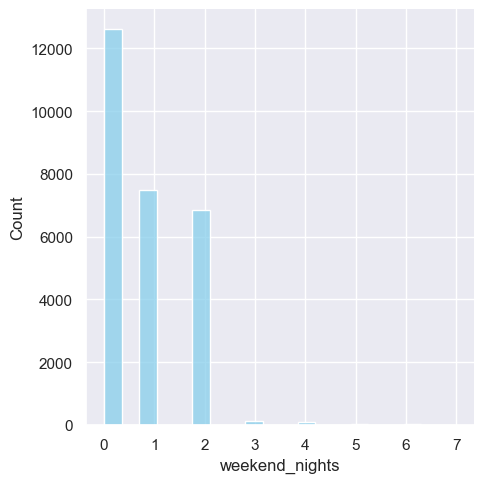

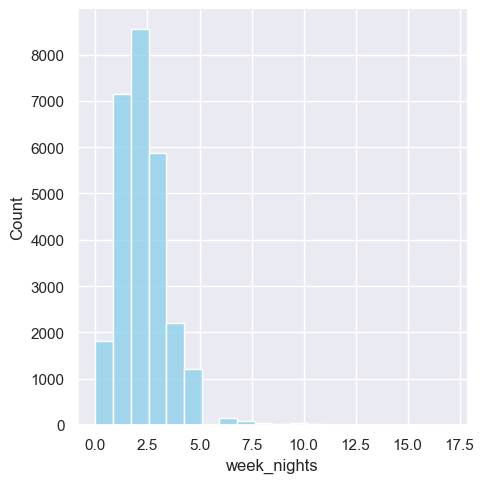

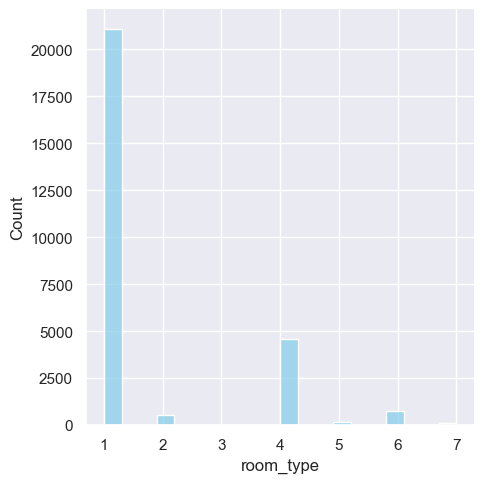

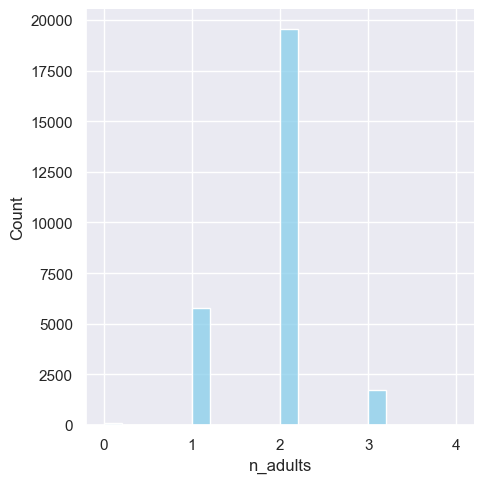

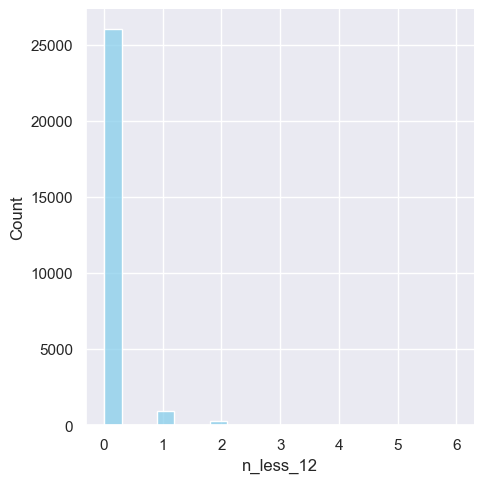

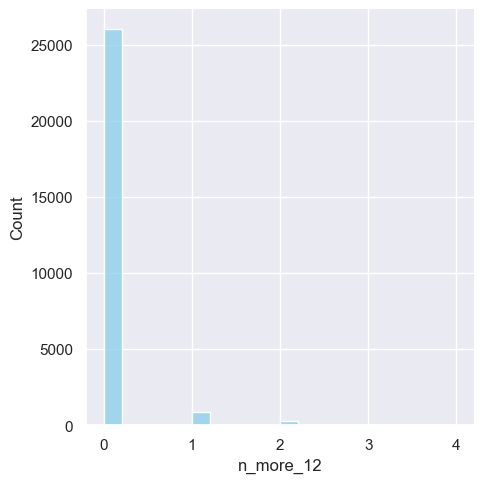

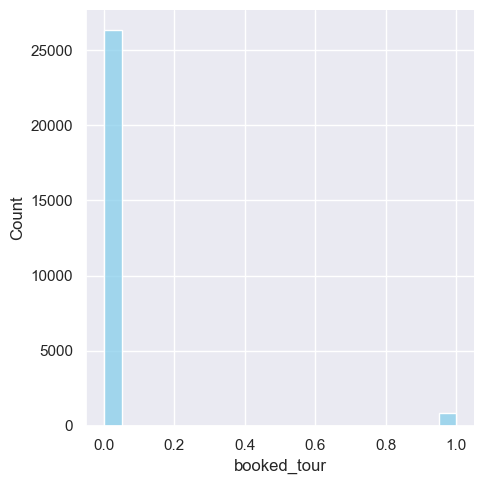

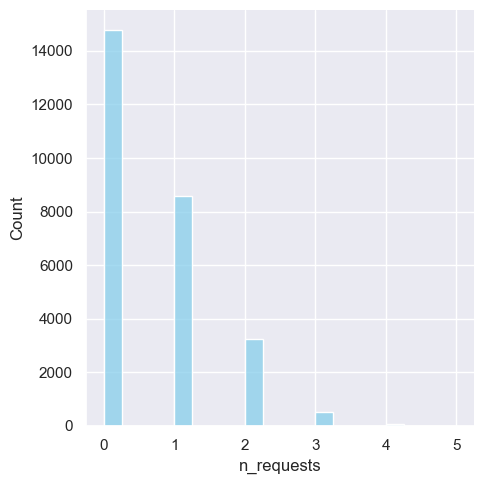

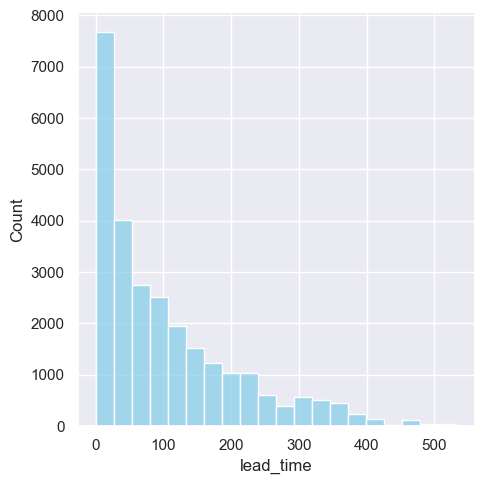

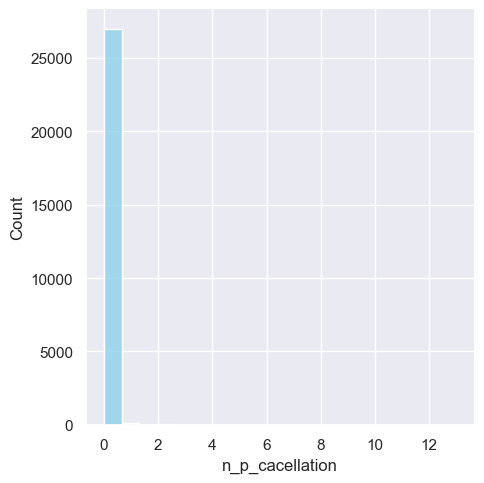

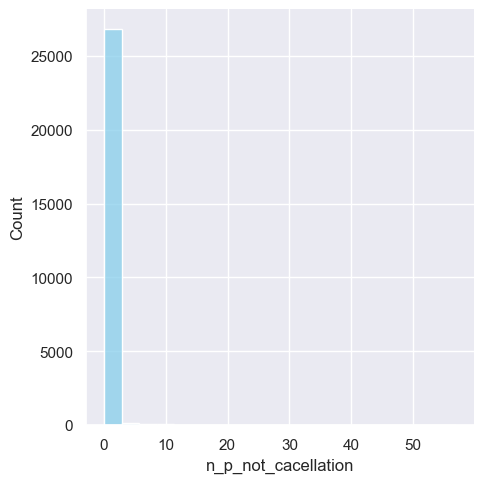

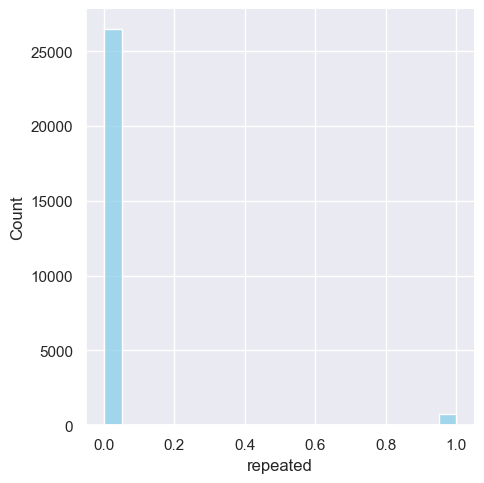

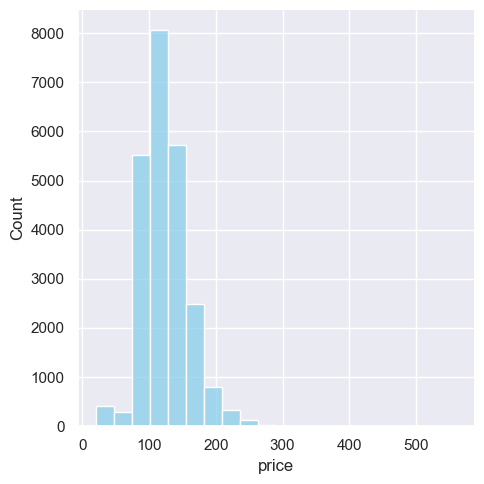

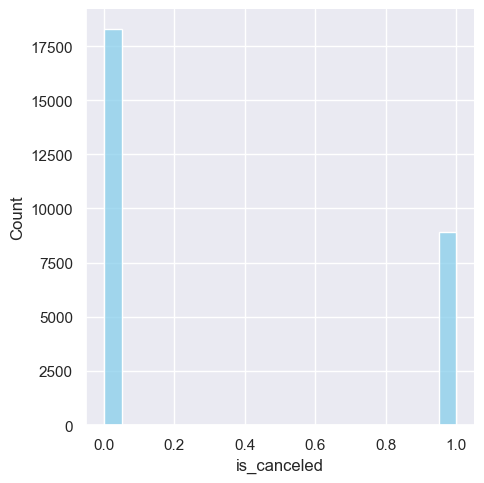

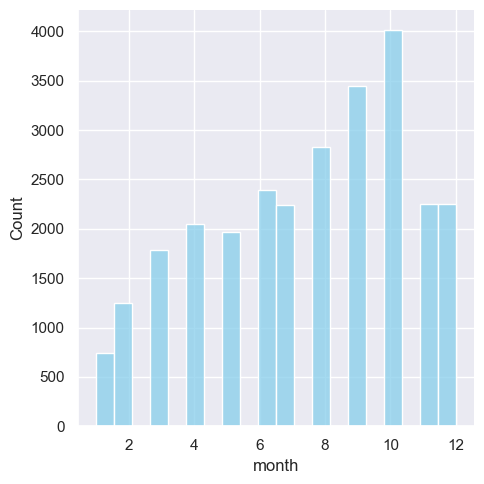

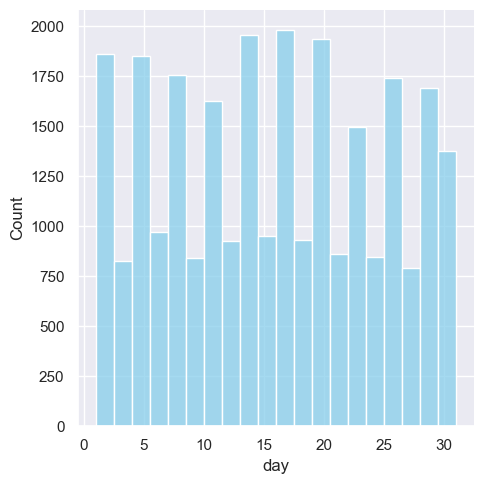

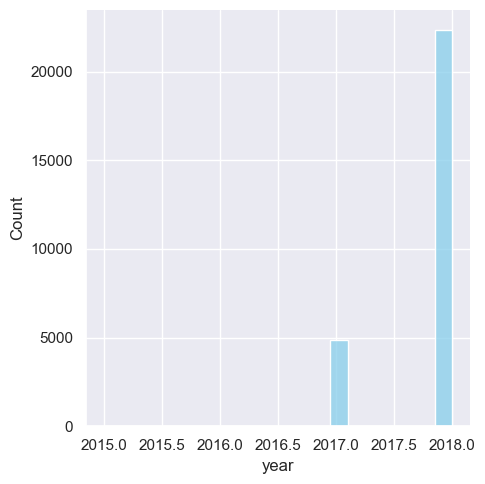

In [611]:
for col in numeric_col:
    sns.displot(numeric_data[col], bins=20, color='skyblue')

From the histograms above it looks like 'price' and 'week_nights' is normal distributed whereas the other attributes are not. Moreover, we can see that 'weekend_nights', 'n_adults', 'n_more_12', 'n_requests', 'room_type', 'Booked_tour', 'n_p_cancellation', 'n_p_not_cancellation', 'repeated', 'month', 'day', 'year' and 'n_less_12' has only few values with importance to the order i.e. it's a categorical ordinal attribute.

#### Statistic information:
Describe function show statistic information for numerical data.

In [612]:
numeric_data.describe()

,weekend_nights,week_nights,room_type,n_adults,n_less_12,n_more_12,booked_tour,n_requests,lead_time,n_p_cacellation,n_p_not_cacellation,repeated,price,is_canceled,month,day,year
count,27213.000000,27213.000000,27213.000000,27213.000000,27213.000000,27213.000000,27213.000000,27213.000000,26794.000000,27213.000000,27213.000000,27213.000000,23808.000000,27213.000000,27213.000000,27213.000000,27213.000000
mean,0.812810,2.197332,1.712637,1.845221,0.052989,0.053357,0.031750,0.621100,102.952377,0.021975,0.155404,0.026421,123.455494,0.327674,7.430456,15.576930,2017.821703
std,0.869317,1.403576,1.404446,0.519715,0.266150,0.268688,0.175336,0.785642,103.498942,0.346697,1.728693,0.160387,35.136566,0.469374,3.061317,8.749339,0.383154
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000,1.000000,1.000000,2015.000000
25%,0.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000,100.300000,0.000000,5.000000,8.000000,2018.000000
50%,1.000000,2.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,69.000000,0.000000,0.000000,0.000000,119.450000,0.000000,8.000000,16.000000,2018.000000
75%,2.000000,3.000000,1.000000,2.000000,0.000000,0.000000,0.000000,1.000000,153.000000,0.000000,0.000000,0.000000,140.000000,1.000000,10.000000,23.000000,2018.000000
max,7.000000,17.000000,7.000000,4.000000,6.000000,4.000000,1.000000,5.000000,532.000000,13.000000,57.000000,1.000000,560.000000,1.000000,12.000000,31.000000,2018.000000


#### Skewness
for the real numeric attributes

In [613]:
for col in ['price', 'week_nights', 'lead_time']:
    print(col+':')
    print('\tskewness:', numeric_data[col].skew(axis = 0, skipna = True))
    print('\tmedian:', numeric_data[col].median(axis = 0, skipna = True))
    

price:
	skewness: 0.682392611272259
	median: 119.45
week_nights:
	skewness: 1.5422954469230514
	median: 2.0
lead_time:
	skewness: 1.291447308852505
	median: 69.0


We can also look at the probability

c:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


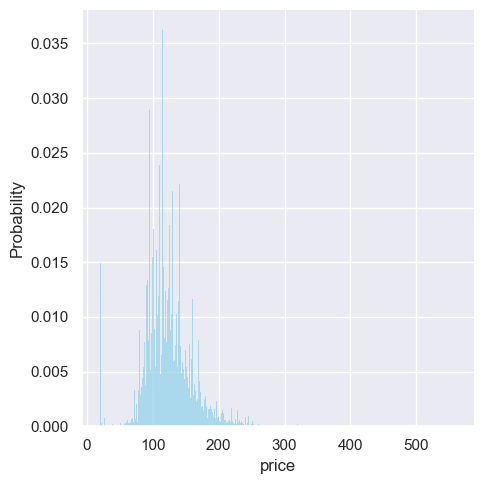

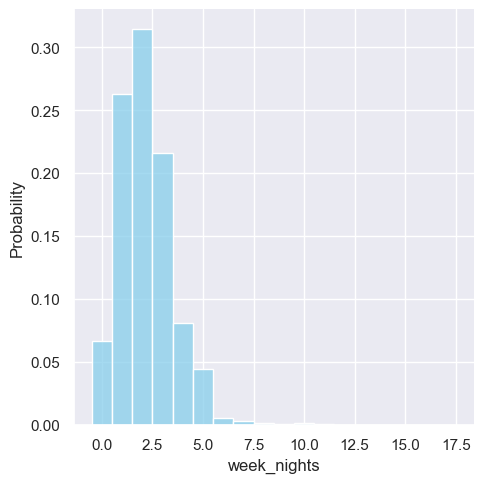

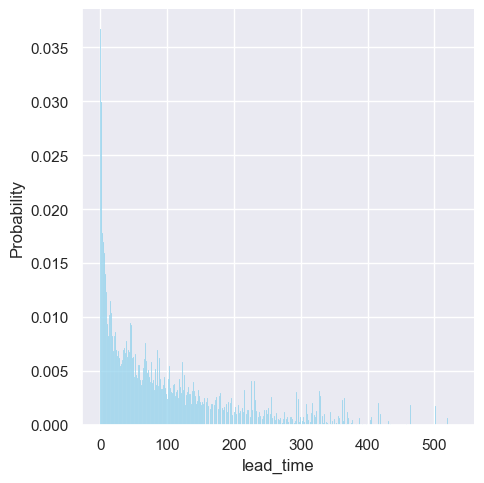

In [614]:
for col in ['price', 'week_nights', 'lead_time']:
    sns.displot(numeric_data[col], color='skyblue' ,stat="probability", discrete=True )

Check the values in 'price'

In [615]:


print('min:', numeric_data['price'].min())
print('max:', numeric_data['price'].max())
print('values over 350:', numeric_data[numeric_data['price']>350].shape[0])
print('values under 10:', numeric_data[numeric_data['price']<30].shape[0])

min: 20.0
max: 560.0
values over 350: 2
values under 10: 395


Maybe there are outliers?

In [616]:
df[df['price']>350]

,ID,weekend_nights,week_nights,room_type,board_type,n_adults,n_less_12,n_more_12,booked_tour,n_requests,...,purchase_type,n_p_cacellation,n_p_not_cacellation,repeated,price,date,is_canceled,month,day,year
4092,INN34307,0,3,6,breakfast,2,0,2,0,1,...,Online,0,0,0,369.63,12/29/2018,0,12,29,2018
9412,INN33115,0,1,1,half board,2,0,0,0,0,...,Offline,0,0,0,560.00,3/25/2018,1,3,25,2018


<Axes: ylabel='price'>

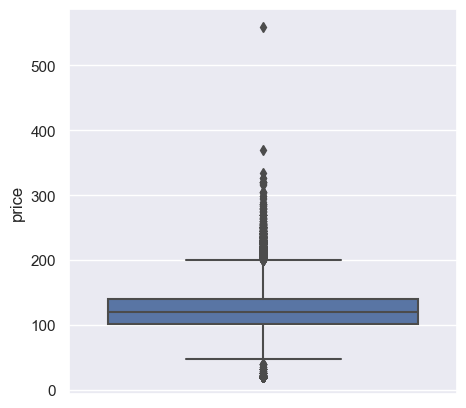

In [617]:
sns.boxplot(y="price", data=df)

<Axes: ylabel='week_nights'>

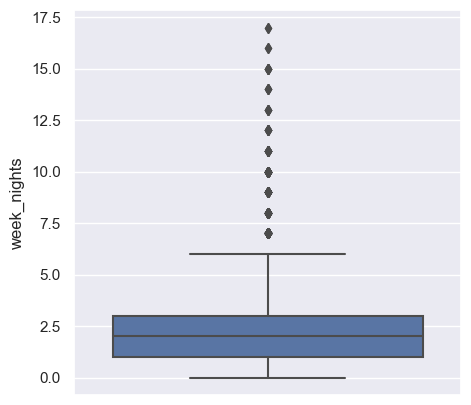

In [618]:
sns.boxplot(y="week_nights", data=df)

<Axes: ylabel='lead_time'>

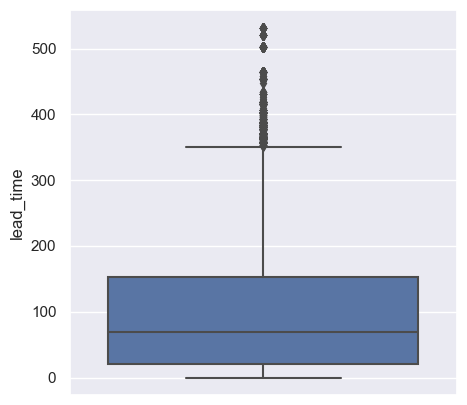

In [619]:
sns.boxplot(y="lead_time", data=df)

### Categorial attributes

In [620]:
cat_col = ['weekend_nights', 'n_adults', 'n_more_12','n_less_12', 'n_requests', 'room_type', 'booked_tour', 'n_p_cacellation', 'n_p_not_cacellation', 'repeated', 'month', 'day', 'year']
for col in cat_col:
    print(numeric_data[col].value_counts().sort_index())
    print('-----------------------------')

weekend_nights
0    12621
1     7492
2     6857
3      115
4       89
5       23
6       15
7        1
Name: count, dtype: int64
-----------------------------
n_adults
0      104
1     5781
2    19565
3     1749
4       14
Name: count, dtype: int64
-----------------------------
n_more_12
0    26051
1      876
2      283
3        2
4        1
Name: count, dtype: int64
-----------------------------
n_less_12
0    26040
1      910
2      260
3        2
6        1
Name: count, dtype: int64
-----------------------------
n_requests
0    14786
1     8596
2     3257
3      511
4       56
5        7
Name: count, dtype: int64
-----------------------------
room_type
1    21084
2      511
3        3
4     4571
5      180
6      741
7      123
Name: count, dtype: int64
-----------------------------
booked_tour
0    26349
1      864
Name: count, dtype: int64
-----------------------------
n_p_cacellation
0     26959
1       154
2        37
3        27
4         9
5         8
11       17
13        2
N

## Nominal data
For nominal data we would like to know how many unique values there are and the distribution.

In [621]:
nominal_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27213 entries, 0 to 27212
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ID             27213 non-null  object
 1   board_type     19045 non-null  object
 2   purchase_type  22366 non-null  object
 3   date           27213 non-null  object
dtypes: object(4)
memory usage: 850.5+ KB


Describe function for nominal data show information about unique value, top value and the top value frequency.

In [622]:
describe_df = nominal_data.describe()
describe_df

,ID,board_type,purchase_type,date
count,27213,19045,22366,27213
unique,27213,4,5,552
top,INN09588,half board,Online,10/13/2018
freq,1,14591,14306,188


Adding the top value frequency in percent.

In [623]:
describe_df.loc['%freq'] = describe_df.apply(lambda x: np.round(x.loc['freq']/891, decimals=3))
describe_df

,ID,board_type,purchase_type,date
count,27213,19045,22366,27213
unique,27213,4,5,552
top,INN09588,half board,Online,10/13/2018
freq,1,14591,14306,188
%freq,0.001,16.376,16.056,0.211


#### Histograms
The columns 'Name' and 'Ticket' have to many unique values so there is no reason to look on their histograms.
Handale missing values - fill in 'NA' just to be able to see the histograms.

In [624]:
nominal_data = nominal_data.fillna('not selected')

In [625]:
nominal_data['board_type'].value_counts()

board_type
half board      14591
not selected     8172
full board       2697
breakfast        1753
Name: count, dtype: int64

In [630]:
nominal_data['purchase_type'].value_counts()
#### noam/amir to change


purchase_type
Online           14306
Offline           6501
not selected      4847
Corporate         1238
Complementary      244
Aviation            77
Name: count, dtype: int64

In [626]:
dist_col = ['Sex', 'Embarked', 'Cabin_sign']
for col in dist_col:
    sns.displot(nominal_data, x=col, shrink=.8, color='skyblue')

ValueError: Could not interpret value `Sex` for parameter `x`

## Target

In [ ]:
sns.displot(target, x='Survived', color='green', discrete=True)

#### Pie chart

In [ ]:
fig1, ax1 = plt.subplots()
ax1.pie(target['Survived'].value_counts(), labels=target['Survived'].unique(), autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal') 
plt.show()

### Exploring the behavior of the attributes according to the target values

In [ ]:
df.groupby('Survived')['Age'].plot(kind='hist', bins=20, alpha=0.5, legend=True)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution by Survival')
plt.show()

#### Scatter plot

In [ ]:
colordict = {0: 'red', 1: 'blue'}

plt.figure(figsize=(15, 6))
plt.scatter(df.index, df['Fare'], c = df['Survived'].map(colordict))
plt.xlabel("Index")
plt.ylabel('Fare')

#### Boxplot graph 

In [ ]:
sns.set(rc={'figure.figsize':(5,8)})
sns.boxplot(y="Age", x="Sex", hue= "Survived", data=df, palette="Set3")